# K-Means

In [215]:


from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

X, y = make_blobs(500, centers=4, random_state=42, cluster_std=1)

df = pd.DataFrame([X[:, 0], X[:, 1], y]).T
df.columns = ["x1", "x2", "label"]
df["label"] = df["label"].astype(int)

df.head()



,x1,x2,label
0,-7.689054,6.620346,3
1,-9.576514,-6.934404,2
2,6.829682,1.164871,1
3,-2.901306,7.550771,0
4,-5.678413,-7.288185,2


Text(0.5, 1.0, 'Original Data')

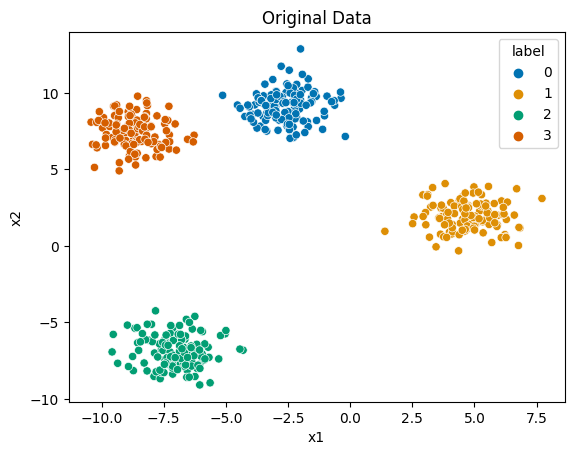

In [216]:
sns.scatterplot(data = df, x = "x1", y = "x2", hue = "label", palette = "colorblind")
plt.title("Original Data")

## Preparing data to unsupirvised

In [217]:
# Remove label as we don't have it in unsupervised learning
X = df.drop("label", axis = 1)
X.head()

,x1,x2
0,-7.689054,6.620346
1,-9.576514,-6.934404
2,6.829682,1.164871
3,-2.901306,7.550771
4,-5.678413,-7.288185


## Feature Scaling

- no train test split
- use whole dataset for scaling

In [218]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X) # Why fit tranform on all of X, Answer: no train test split so we scale all of X, because we dont have y.
scaled_X[:5] # First 5 rows


array([[-0.81539333,  0.58938951],
       [-1.17344434, -1.55328827],
       [ 1.93881064, -0.27298895],
       [ 0.0928425 ,  0.73646712],
       [-0.43397474, -1.60921239]])

Text(0.5, 1.0, 'Scaled X with feature standardization, no labels')

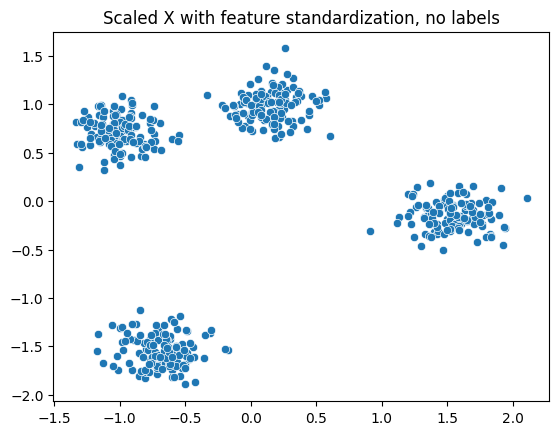

In [219]:
sns.scatterplot(x= scaled_X[:,0], y = scaled_X[:,1])
plt.title("Scaled X with feature standardization, no labels")

In [220]:
from sklearn.cluster import KMeans

clusters = range(1, 10)
sum_squared_distance = [KMeans(k, n_init = "auto").fit(scaled_X).inertia_ for k in clusters] # inertia_ is the sum of squared distance of each point to its cluster center

sum_squared_distance

[999.9999999999994,
 558.08510644422,
 116.09567852755526,
 28.786938978874005,
 26.22078588872121,
 23.474915942301017,
 20.286145408651542,
 18.91001189249272,
 16.44555493161405]

Text(0.5, 1.0, 'Elbow Method for Optimal k')

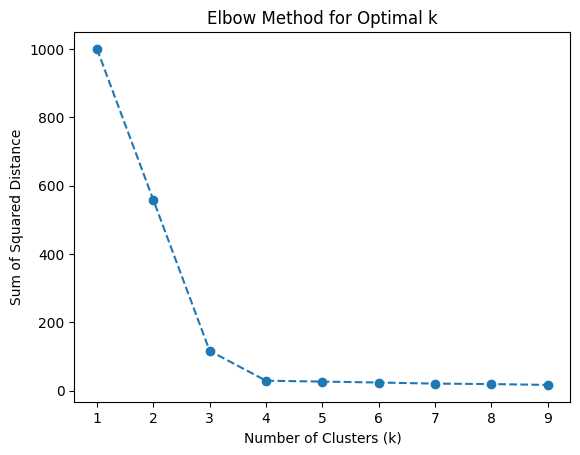

In [221]:
plt.plot(clusters, sum_squared_distance, "o--")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Sum of Squared Distance")
plt.title("Elbow Method for Optimal k")

In [222]:
pd.Series(sum_squared_distance).diff()[1:]
# We want the largest difference. In this case it is 3
# k = 3

1   -441.914894
2   -441.989428
3    -87.308740
4     -2.566153
5     -2.745870
6     -3.188771
7     -1.376134
8     -2.464457
dtype: float64

## Silhouette


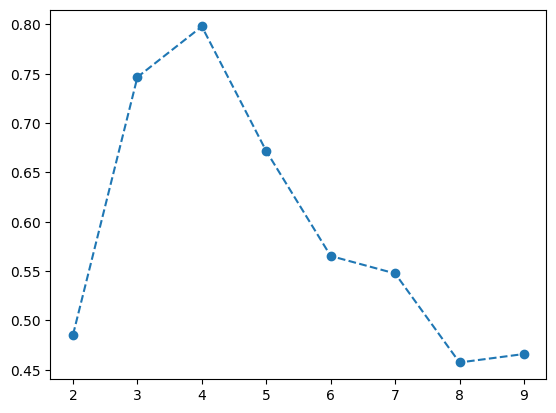

In [223]:
from sklearn.metrics import silhouette_score
# Silhouette score is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation).
# The silhouette ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

kmeans = [KMeans(k, n_init = "auto").fit(scaled_X) for k in clusters]
kmeans
silhouette_scores = [silhouette_score(scaled_X, kmean.labels_) for kmean in kmeans[1:]]
plt.plot(clusters[1:], silhouette_scores, "o--")

## Visualization

In [224]:
df_plot = pd.DataFrame(scaled_X, columns = ["x1", "x2"])
df_plot.head()

,x1,x2
0,-0.815393,0.589390
1,-1.173444,-1.553288
2,1.938811,-0.272989
3,0.092842,0.736467
4,-0.433975,-1.609212


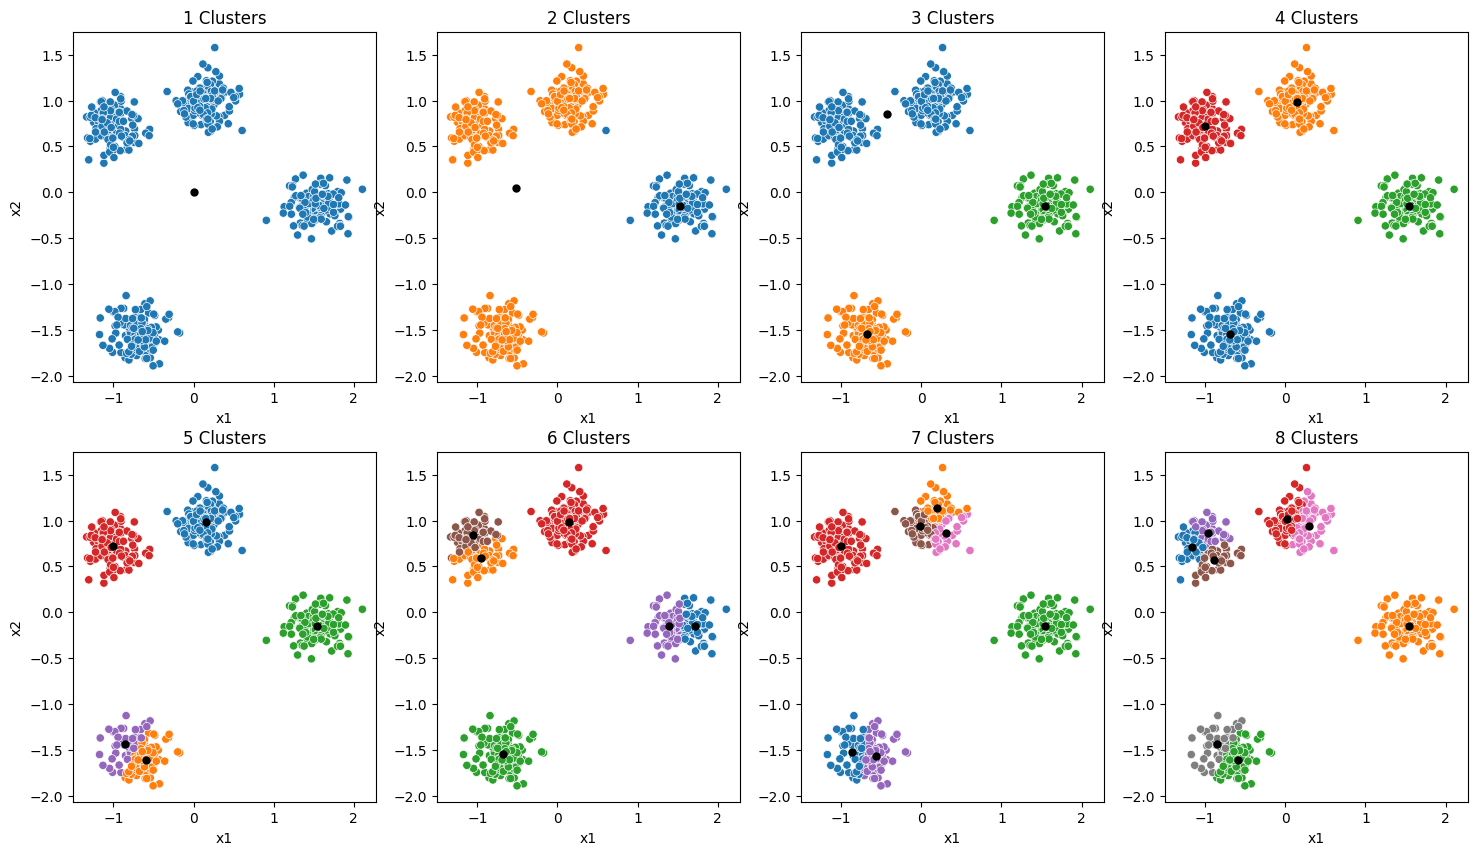

In [225]:



fig, axes = plt.subplots(2, 4, figsize = (18,10))

# We want to plot first 1 cluster, 2 then 3 then 4 and so on.

for i, ax in enumerate(axes.flatten()): #enumerate returns index and value, flatten returns a 1D array
    cluster_centers = kmeans[i].cluster_centers_ # _after the name of the variable means it is a variable that is created by the algorithm
    df_plot["label"] = kmeans[i].labels_

    sns.scatterplot(data = df_plot, x = "x1", y = "x2", hue = "label", palette = "tab10", ax = ax)
    ax.scatter(cluster_centers[:,0], cluster_centers[:,1], marker = ".", color = "black", s = 100,)

    ax.legend([], [], frameon = False)

    ax.set(title = f"{i+1} Clusters")

# we can see that clustering does not add or remove any data points, it just groups them together.

In [226]:
kmeans[2].cluster_centers_

array([[-0.42704371,  0.85078316],
       [-0.68486276, -1.54855438],
       [ 1.53895017, -0.15301193]])